<a href="https://colab.research.google.com/github/kevincong95/cs231n-emotiw/blob/master/notebooks/audio/1.0-la-audio-openl3-retrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone 'https://github.com/kevincong95/cs231n-emotiw.git'

Cloning into 'cs231n-emotiw'...
remote: Enumerating objects: 363, done.
remote: Counting objects: 100% (363/363), done.
remote: Compressing objects: 100% (256/256), done.
remote: Total 617 (delta 233), reused 223 (delta 106), pack-reused 254
Receiving objects: 100% (617/617), 173.23 MiB | 41.63 MiB/s, done.
Resolving deltas: 100% (366/366), done.


In [0]:
# Switch to TF 1.x and navigate to the directory
%tensorflow_version 1.x
!pwd
import os
os.chdir('cs231n-emotiw')
!pwd

# Install required packages 
!pip install -r 'requirements-predictions.txt'

TensorFlow 1.x selected.
/content
/content/cs231n-emotiw
     |████████████████████████████████| 389kB 8.4MB/s 
     |████████████████████████████████| 634kB 14.1MB/s 
     |████████████████████████████████| 3.3MB 24.9MB/s 
     |████████████████████████████████| 26.9MB 113kB/s 
     |████████████████████████████████| 337kB 61.4MB/s 
     |████████████████████████████████| 25.4MB 80kB/s 
     |████████████████████████████████| 100.2MB 31kB/s 
  Created wheel for moviepy: filename=moviepy-1.0.3-cp36-none-any.whl size=110728 sha256=8a121795e5493358a1e1f2b7f70300864fbeb5aaf85364f7b105ff2a713b8132
  Stored in directory: /root/.cache/pip/wheels/e0/fe/1c/f4e6dca9e828d4b979c04e461d7fcc5b8e7bd35f947e665b65
  Created wheel for openl3: filename=openl3-0.3.1-py2.py3-none-any.whl size=249323247 sha256=ec03e27306aef94e8ff14a637c71c4a32acd9861d27d1d979e79a02b42c78bf1
  Stored in directory: /root/.cache/pip/wheels/13/63/c9/35868f3dd3b466909e73178db8566430da2d093cc055b932b1
  Created wheel for imgaug:

In [0]:
cp '/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/datasets/emotiw/Train.zip' '/content/'

In [0]:
cp '/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/datasets/emotiw/Val.zip' '/content/'

In [0]:
cp '/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/datasets/emotiw/Train_labels.txt' '/content/'

In [0]:
cp '/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/datasets/emotiw/Val_labels.txt' '/content/'

In [0]:
!unzip /content/Train.zip

Archive:  /content/Train.zip
   creating: Train/
  inflating: Train/2_2.mp4           
  inflating: Train/3_4.mp4           
  inflating: Train/3_5.mp4           
  inflating: Train/3_8.mp4           
  inflating: Train/3_9.mp4           
  inflating: Train/3_10.mp4          
  inflating: Train/3_11.mp4          
  inflating: Train/3_12.mp4          
  inflating: Train/3_14.mp4          
  inflating: Train/3_15.mp4          
  inflating: Train/3_16.mp4          
  inflating: Train/3_17.mp4          
  inflating: Train/3_18.mp4          
  inflating: Train/3_19.mp4          
  inflating: Train/3_22.mp4          
  inflating: Train/3_24.mp4          
  inflating: Train/3_27.mp4          
  inflating: Train/3_34.mp4          
  inflating: Train/3_36.mp4          
  inflating: Train/3_38.mp4          
  inflating: Train/3_39.mp4          
  inflating: Train/3_40.mp4          
  inflating: Train/4_5.mp4           
  inflating: Train/4_7.mp4           
  inflating: Train/4_12.mp4          
 

In [0]:
!!unzip /content/Val.zip

['Archive:  /content/Val.zip',
 '   creating: Val/',
 '  inflating: Val/1_1.mp4             ',
 '  inflating: Val/1_2.mp4             ',
 '  inflating: Val/5_1.mp4             ',
 '  inflating: Val/5_2.mp4             ',
 '  inflating: Val/5_3.mp4             ',
 '  inflating: Val/5_4.mp4             ',
 '  inflating: Val/5_5.mp4             ',
 '  inflating: Val/5_6.mp4             ',
 '  inflating: Val/5_7.mp4             ',
 '  inflating: Val/5_8.mp4             ',
 '  inflating: Val/5_9.mp4             ',
 '  inflating: Val/5_10.mp4            ',
 '  inflating: Val/5_11.mp4            ',
 '  inflating: Val/5_12.mp4            ',
 '  inflating: Val/5_13.mp4            ',
 '  inflating: Val/5_14.mp4            ',
 '  inflating: Val/5_15.mp4            ',
 '  inflating: Val/5_16.mp4            ',
 '  inflating: Val/5_17.mp4            ',
 '  inflating: Val/5_18.mp4            ',
 '  inflating: Val/5_19.mp4            ',
 '  inflating: Val/11_1.mp4            ',
 '  inflating: Val/11_2

In [0]:
from src.preprocessors.audio_preprocessor import AudioPreprocessor
audio_preprocessor_train = AudioPreprocessor(video_folder='Train/' , output_folder='train-full/' , label_path='../Train_labels.txt')

Video Preprocessor created with video_folder = Train/ , output_folder = train-full/, output_file = None
Frames will be created with hop_size = 0.5


In [0]:
audio_preprocessor_train.preprocess(batch_size=32)

Streaming output truncated to the last 5000 lines.
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 315_6.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 315_7.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 315_8.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 315_9.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 316_1.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 316_10.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 316_11.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 316_12.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ 

In [0]:
!cp '/content/cs231n-emotiw/train-full/audio-pickle-all-X-openl3.pkl' '/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-final'

In [0]:
!cp '/content/cs231n-emotiw/train-full/audio-pickle-all-Y-openl3.pkl' '/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-final'

In [0]:
from src.preprocessors.audio_preprocessor import AudioPreprocessor
audio_preprocessor_val = AudioPreprocessor(video_folder='Val/' , output_folder='val-full/' , label_path='../Val_labels.txt')

Video Preprocessor created with video_folder = Val/ , output_folder = val-full/, output_file = None
Frames will be created with hop_size = 0.5


In [0]:
audio_preprocessor_val.preprocess(batch_size=32)

Skipping unzipping files as input is a folder
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 100_1.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 100_3.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 100_4.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 104_2.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 104_3.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 104_4.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 115_1.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Reading file 115_10.mp4extracted_audio.wav ...
Moviepy - Running:
>>> "+ " ".joi

In [0]:
!cp '/content/cs231n-emotiw/val-full/audio-pickle-all-X-openl3.pkl' '/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-final'

In [0]:
!cp '/content/cs231n-emotiw/val-full/audio-pickle-all-Y-openl3.pkl' '/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-final'

In [0]:
import numpy as np

In [0]:
X_train = np.load('/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-final/audio-pickle-all-X-openl3-train.pkl', allow_pickle=True)
Y_train = np.load('/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-final/audio-pickle-all-Y-openl3-train.pkl' , allow_pickle=True)

Y_val = np.load('/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-final/audio-pickle-all-Y-openl3-val.pkl' , allow_pickle=True)
X_val = np.load('/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-final/audio-pickle-all-X-openl3-val.pkl' , allow_pickle=True)

In [0]:
def normalize(X_train , X_val):
    from sklearn.preprocessing import Normalizer
    X_train_copy = X_train
    X_val_copy = X_val
    scaler = Normalizer()

    for i in range(0,X_train_copy.shape[0]):
      X_train_copy[i] = scaler.fit_transform(X_train_copy[i])

    for i in range(0,X_val_copy.shape[0]):
      X_val_copy[i] = scaler.fit_transform(X_val_copy[i])

    return X_train_copy , X_val_copy

In [0]:
X_train_norm , X_val_norm = normalize(X_train , X_val)

In [0]:
%tensorflow_version 2.x

In [0]:
 def train(X_train, y_train, epochs=4000 , batch_size=32 , X_val=[None] , Y_val=[None] , val_split=0.1, save_path = None):
      """
      Train function with the model architecture

      - Outputs
        1. Trained model -- saves the model as a .h5 file to the specified path

      """
      import tensorflow as tf
      from tensorflow import keras
      from tensorflow.keras.callbacks import EarlyStopping
      from tensorflow.keras.callbacks import ModelCheckpoint


      # ******** Keras Functional API ********
      inputs = tf.keras.Input(shape=[None,6144])

      # CNN Portion
      x =  tf.keras.layers.Conv1D(64, 2, activation='selu')(inputs) # This does convolves on the time domain. I.e. it is NOT time distributed. 
      x = tf.keras.layers.BatchNormalization()(x)
      x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding='valid')(x)
      x = tf.keras.layers.Dropout(0.4)(x)
      x = tf.keras.layers.Conv1D(512, 2, activation='selu')(x)
      x = tf.keras.layers.BatchNormalization()(x)
      x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding='valid')(x)
      x = tf.keras.layers.Dropout(0.2)(x)
      x = tf.keras.layers.Conv1D(512, 2, activation='selu')(x)
      x = tf.keras.layers.BatchNormalization()(x)
      x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding='valid')(x)
      x = tf.keras.layers.Dropout(0.2)(x)
      
      # Recurrent Portion
      x = tf.keras.layers.Bidirectional(keras.layers.LSTM(10, return_sequences=True, input_shape=[None, 6144] ,  dropout=0.2 , activation='selu'))(x)
      x = tf.keras.layers.Bidirectional(keras.layers.LSTM(5))(x)
      x = tf.keras.layers.Dense(32 , activation='selu')(x)
      x = tf.keras.layers.Dropout(0.4)(x)    
      outputs = tf.keras.layers.Dense(3 , activation='softmax')(x)

      # Define Hyperparams and Compile
      lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate= 4.4274509683752373e-05, #This LR came from the hyperparameter tuning using the HyperAS (modified HyperOpt for Keras) -- randomized search
        decay_steps=10000,
        decay_rate=0.9)
      rnn_ae = keras.Model(inputs=inputs, outputs=outputs)
      opt = keras.optimizers.Adam(learning_rate=lr_schedule)
      rnn_ae.compile(loss='sparse_categorical_crossentropy', optimizer=opt , metrics=['accuracy'])

      history = None 

      if X_val.any == None or Y_val.any == None:
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300)
        mc = ModelCheckpoint(save_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        history = rnn_ae.fit(X_train , y_train , epochs=epochs , batch_size=batch_size,  validation_split=val_split , callbacks=[es, mc])
        return rnn_ae , history
      
      es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300)
      mc = ModelCheckpoint(save_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
      history = rnn_ae.fit(X_train , y_train , epochs=epochs , batch_size=batch_size,  validation_data=(X_val, Y_val), callbacks=[es, mc])
      return rnn_ae , history


In [0]:
model , history = train(X_train_norm , Y_train , X_val=X_val_norm , Y_val=Y_val , save_path='/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/models/openl3-cnn-lstm-tuned-lr.h5')

Epoch 1/4000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
84/84 [==============================] - ETA: 0s - loss: 1.0759 - accuracy: 0.4273WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f27cc535a60> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach t

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'][:25], hist['accuracy'][:25],
          label='Train Accuracy')
  plt.plot(hist['epoch'][:25], hist['val_accuracy'][:25],
          label = 'Val Accuracy')
  plt.ylim([0,1])
  plt.legend()
  plt.show()

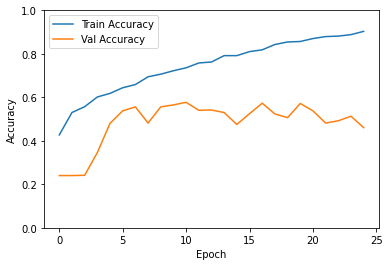

In [0]:
plot_history(history)